In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


Assignment 1 – Simple Linear Regression

Learned slope (m): 4.012084035937595
Learned intercept (c): 6.098926064917208

--- Evaluation ---
Train MAE: 3.720590817861557
Train MSE: 21.58673262633427
Train R² : 0.9937311748690295

Test MAE: 3.0065617374915616
Test MSE: 15.551056057254428
Test R² : 0.9953276546110366


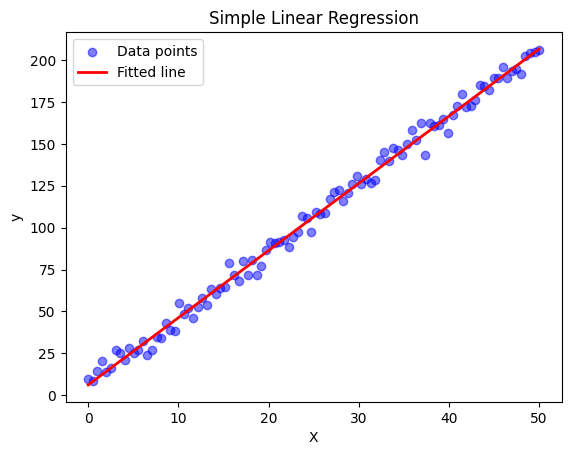

In [8]:
m = 4    
c = 7    
np.random.seed(42)  
X = np.linspace(0, 50, 100).reshape(-1, 1)


noise = np.random.normal(0, 5, X.shape[0])   
y = (m * X.flatten()) + c + noise


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Learned slope (m):", model.coef_[0])
print("Learned intercept (c):", model.intercept_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n--- Evaluation ---")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R² :", r2_score(y_train, y_train_pred))

print("\nTest MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R² :", r2_score(y_test, y_test_pred))

plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


Assignment 2: Multiple Linear Regression

Original coefficients: [3, 5]
Learned coefficients : [4.01208404 4.01208404]
Original intercept   : 10
Learned intercept    : 27.956171411082437

--- Evaluation ---
Train MAE: 7.441181635723121
Train MSE: 86.34693050533706
Train R² : 0.9937311748690295

Test MAE: 6.013123474983114
Test MSE: 62.20422422901777
Test R² : 0.9953276546110366


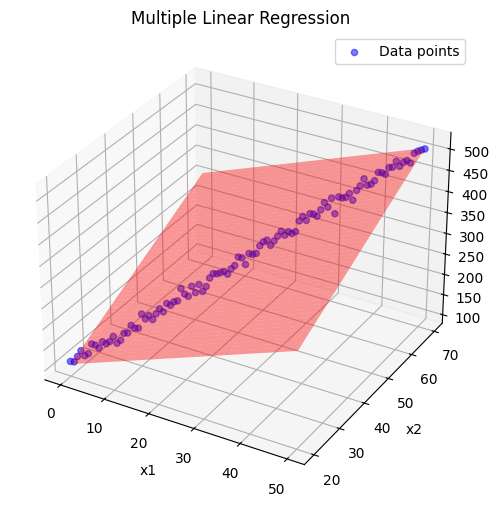

In [9]:
a1 = 3    
a2 = 5   
c = 10 

np.random.seed(42)
x1 = np.linspace(0, 50, 100)
x2 = np.linspace(20, 70, 100)

noise = np.random.normal(0, 10, 100)  
y = a1*x1 + a2*x2 + c + noise

X = np.column_stack((x1, x2))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Original coefficients:", [a1, a2])
print("Learned coefficients :", model.coef_)
print("Original intercept   :", c)
print("Learned intercept    :", model.intercept_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n--- Evaluation ---")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R² :", r2_score(y_train, y_train_pred))
print("\nTest MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R² :", r2_score(y_test, y_test_pred))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color="blue", alpha=0.5, label="Data points")

x1_grid, x2_grid = np.meshgrid(x1, x2)
y_grid = model.intercept_ + model.coef_[0]*x1_grid + model.coef_[1]*x2_grid
ax.plot_surface(x1_grid, x2_grid, y_grid, color="red", alpha=0.4)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Multiple Linear Regression")
plt.legend()
plt.show()


Assignment 3: Polynomial Regression

Original equation: y = 2x² + -3x + 5
Learned coefficients (b, a): [-2.94649554  2.01831541]
Learned intercept: 3.1796634846952543

--- Evaluation ---
Train MAE: 7.460185935858183
Train MSE: 86.0257831653505
Train R² : 0.9792618170432623

Test MAE: 6.006414772521419
Test MSE: 61.96330450394978
Test R² : 0.9848893852209746


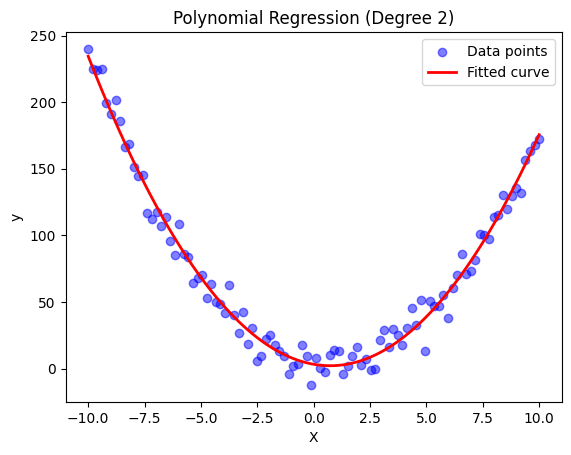

In [12]:
a, b, c = 2, -3, 5

np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)

noise = np.random.normal(0, 10, X.shape[0])
y = a*(X.flatten()**2) + b*X.flatten() + c + noise

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Original equation: y = {}x² + {}x + {}".format(a, b, c))
print("Learned coefficients (b, a):", model.coef_)
print("Learned intercept:", model.intercept_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n--- Evaluation ---")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R² :", r2_score(y_train, y_train_pred))

print("\nTest MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R² :", r2_score(y_test, y_test_pred))

X_sorted = np.sort(X, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_pred_line = model.predict(X_sorted_poly)

plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X_sorted, y_pred_line, color="red", linewidth=2, label="Fitted curve")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()
